### StreetEasy

StreetEasy is New York City's leading real estate marketplace.
We will be working with a dataset that contains a sample of 5000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.


In [3]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
# Load the data
df = pd.read_csv("streeteasy.csv")
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


Dataset has the following columns:
- **rental_id** - rental ID
- **rent** - price of rent in dollars
- **bedrooms** - number of bedrooms
- **bathrooms** - number of bathrooms
- **size_sqft** - size in square feet
- **min_to_subway** - distance from subway station in minutes
- **floor** - floor number
- **building_age_yrs** - building’s age in years
- **no_fee** - does it have a broker fee? (0 for fee, 1 for no fee)
- **has_roofdeck** - does it have a roof deck? (0 for no, 1 for yes)
- **has_washer_dryer** - does it have washer/dryer in unit? (0/1)
- **has_doorman** - does it have a doorman? (0/1)
- **has_elevator** - does it have an elevator? (0/1)
- **has_dishwasher** - does it have a dishwasher (0/1)
- **has_patio** - does it have a patio? (0/1)
- **has_gym** - does the building have a gym? (0/1)
- **neighborhood** - (ex: Greenpoint)
- **borough** - (ex: Brooklyn)

Create a dataframe x that selects the following columns from the main df:
- **bedrooms** 
- **bathrooms** 
- **size_sqft** 
- **min_to_subway** 
- **floor** 
- **building_age_yrs** 
- **no_fee** 
- **has_roofdeck** 
- **has_washer_dryer** 
- **has_doorman** 
- **has_elevator** 
- **has_dishwasher** 
- **has_patio** 
- **has_gym** 

Create a dataframe y that selects the rent column from the main df.

In [5]:
x = df[["bedrooms", "bathrooms", "size_sqft", "min_to_subway", "floor", "building_age_yrs", "no_fee", "has_roofdeck", "has_washer_dryer", "has_doorman", "has_elevator", "has_dishwasher", "has_patio", "has_gym"]]
y = df[["rent"]]

In [6]:
# Use scikit-learn train_test_split() method to split x into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [7]:
# Have a look at the shapes of x_train, x_test, y_train, and y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000, 1)
(1000, 1)


In [8]:
# Create and fit Linear Regression model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [9]:
# Use the model to predict y-values from x_test. Store the predictions in a variable called y_predict
y_predict = mlr.predict(x_test)

In [10]:
# Print out the coefficients
print(mlr.coef_)

[[-461.17539618 1278.6000335     4.81900428  -14.94950189   38.70966963
    -4.52297793  -90.26769009   90.64556132  196.97409914  -41.5462096
   224.20724181    9.0336051    24.12310573  -86.37764952]]


To see if there are any features that don't affect price linearly, let's graph the different features against rent.

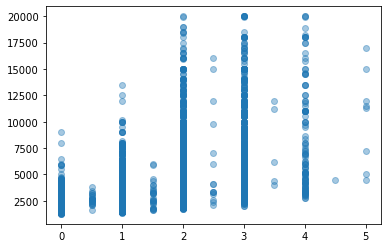

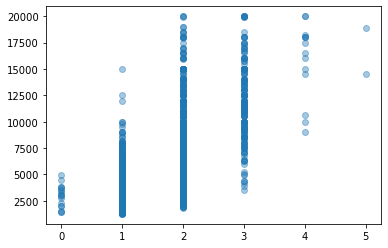

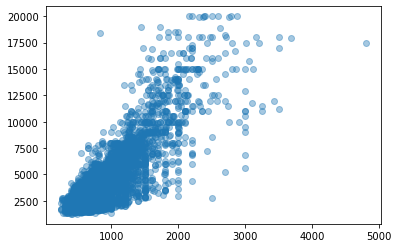

In [11]:
plt.scatter(df[["bedrooms"]], df[["rent"]], alpha=0.4)
plt.show()
plt.scatter(df[["bathrooms"]], df[["rent"]], alpha=0.4)
plt.show()
plt.scatter(df[["size_sqft"]], df[["rent"]], alpha=0.4)
plt.show()

#### Visualizing results with Matplotlib
We've performed Multiple Linear Regression, and we also have the predictions in y_predict. However, we don't have insight into the data, yet. We will create a 2D scatterplot to see how the independent variables impact prices.

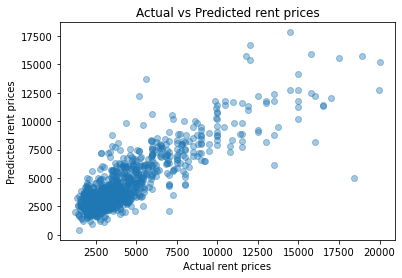

In [12]:
# Create a 2D scatter plot using y_test and y_predict
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual rent prices")
plt.ylabel("Predicted rent prices")
plt.title("Actual vs Predicted rent prices")
plt.show()

In [13]:
# Use the .score() method from LinearRegression to find the mean squared error regression loss for the training set
print("Train score:")
print(mlr.score(x_train, y_train))

# Use the .score() method from LinearRegression to find the mean squared error regression loss for the testing set
print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.7349688159822418
Test score:
0.7158565217228234


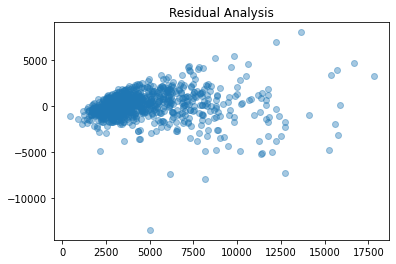

In [14]:
# Graph a scatterplot of residuals vs. predicted_y values
residuals = y_predict - y_test 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()

Now let's rebuild the model using the new features as well as evaluate the new model to see if we improved.

In [20]:
# Use one-hot encoding on borough column
print(df.borough.unique())

df = df.drop("borough_cat", axis=1)
bor_ohe = pd.get_dummies(df["borough"])
bor_ohe.head(10)
df_with_ohe = pd.concat([df, bor_ohe], axis=1)
df_with_ohe.head(10)


['Manhattan' 'Queens' 'Brooklyn']


,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,Brooklyn,Manhattan,Queens
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,...,1,1,0,1,Upper East Side,All Upper East Side,Manhattan,0,1,0
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,...,0,0,0,0,Greenwich Village,All Downtown,Manhattan,0,1,0
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,...,0,0,0,0,Astoria,Northwest Queens,Queens,0,0,1
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,...,1,1,0,0,Midtown,All Midtown,Manhattan,0,1,0
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,...,1,1,0,1,Greenwich Village,All Downtown,Manhattan,0,1,0
5,2869,8967298,3600,3.0,2,900,4,1.0,15,1,...,0,0,0,0,Williamsburg,North Brooklyn,Brooklyn,1,0,0
6,10524,60898078,1950,1.0,1,950,1,3.0,83,0,...,0,0,0,0,Forest Hills,Central Queens,Queens,0,0,1
7,3946,23468975,17500,2.0,2,4800,3,4.0,136,0,...,1,1,0,1,Soho,All Downtown,Manhattan,0,1,0
8,5465,73060494,3500,1.0,1,996,9,7.0,3,1,...,0,0,0,0,Astoria,Northwest Queens,Queens,0,0,1
9,10817,64726877,3800,3.0,2,1100,3,5.0,101,0,...,0,0,0,0,Central Harlem,All Upper Manhattan,Manhattan,0,1,0


In [25]:
# Remove some of the features that don't have strong correlations and see if your scores improved
x = df_with_ohe[["bedrooms", "bathrooms", "size_sqft", "min_to_subway", "floor", "no_fee", "has_roofdeck", "has_washer_dryer", "has_elevator", "has_gym", "Manhattan", "Queens", "Brooklyn"]]
y = df_with_ohe[["rent"]]

# Use scikit-learn train_test_split() method to split x into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

# Have a look at the shapes of x_train, x_test, y_train, and y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Create and fit Linear Regression model
mlr_new = LinearRegression()
mlr_new.fit(x_train, y_train)

# Use the model to predict y-values from x_test. Store the predictions in a variable called y_predict
y_predict = mlr_new.predict(x_test)

# Use the .score() method from LinearRegression to find the mean squared error regression loss for the training set
print("Train score:")
print(mlr_new.score(x_train, y_train))

# Use the .score() method from LinearRegression to find the mean squared error regression loss for the testing set
print("Test score:")
print(mlr_new.score(x_test, y_test))

(4000, 13)
(1000, 13)
(4000, 1)
(1000, 1)
Train score:
0.7691616175750734
Test score:
0.7495179844079503


We improved the model (training score: 0.7691616175750734, testing score: 0.7495179844079503) by removing some features that don't have strong correlations and adding features that do (borough, converted using one-hot encoding).